In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#question 4
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


#question 5
7662 rows x 4 columns

In [4]:
datatypes = gdp_df.dtypes
datatypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

object,int,float,float

In [6]:
#question 6
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Year": "Year","Value": "GDP_Per_Capita"}).drop(columns = ["Value Footnotes"])
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [7]:
#question 7
gdp_count = gdp_df.Country.value_counts().to_frame()
gdp_count

,count
Country,
Least developed countries: UN classification,33
Middle East & North Africa,33
Middle East & North Africa (IDA & IBRD),33
Middle income,33
Mongolia,33
...,...
Kosovo,15
Sint Maarten (Dutch part),14
Turks and Caicos Islands,12


In [8]:
len(gdp_count[gdp_count['count'] == 33])

202

In [9]:
len(gdp_count[gdp_count['count'] < 33])

40

In [10]:
single_gdp_df = gdp_df.loc[(gdp_df.Year == 2020)]
single_gdp_df

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


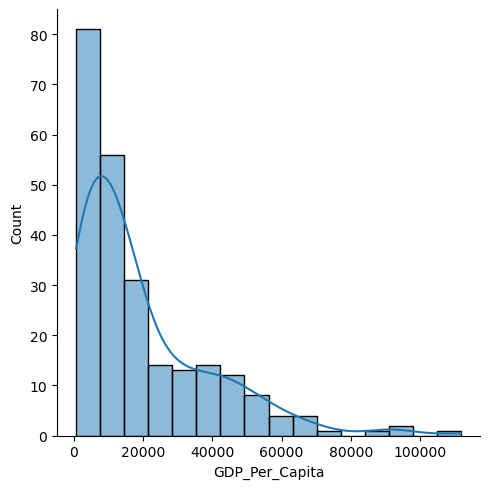

In [11]:
sns.displot( data=single_gdp_df.GDP_Per_Capita, kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

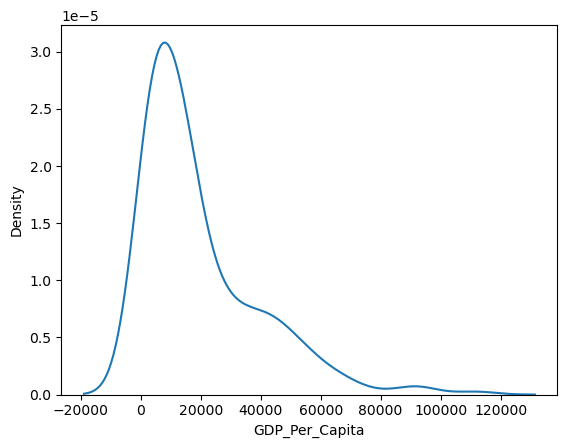

In [12]:
sns.kdeplot(single_gdp_df['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

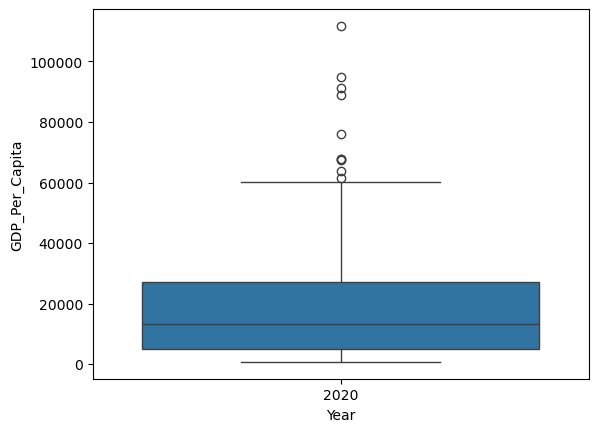

In [13]:
sns.boxplot( x=single_gdp_df["Year"], y=single_gdp_df["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

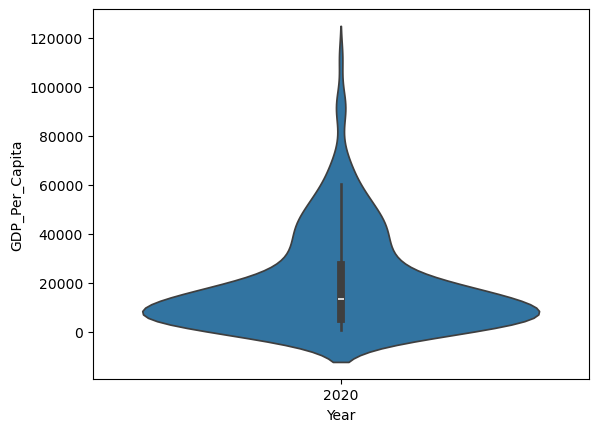

In [14]:
sns.violinplot(x=single_gdp_df["Year"], y=single_gdp_df["GDP_Per_Capita"])

In [15]:
median_gdp_df= single_gdp_df['GDP_Per_Capita'].median()
median_gdp_df

13357.997573370474

In [16]:
gdp_decades = gdp_df.loc[(gdp_df.Year == 1990)|(gdp_df.Year == 2000)|(gdp_df.Year == 2010)|(gdp_df.Year == 2020)]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [17]:
#ignore
#gdp_decades = gdp_df_decades.groupby('Year')[['GDP_Per_Capita']].mean().reset_index()
#gdp_decades

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

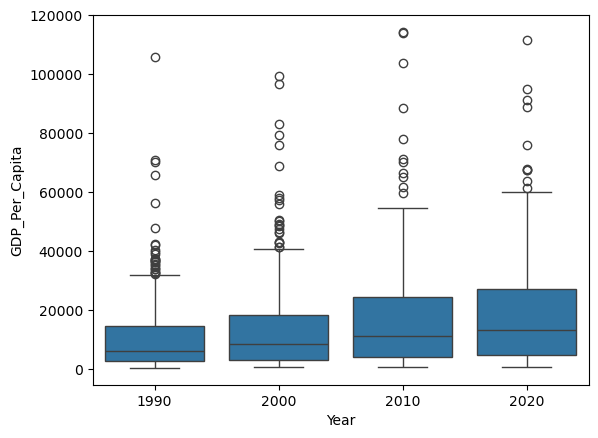

In [18]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

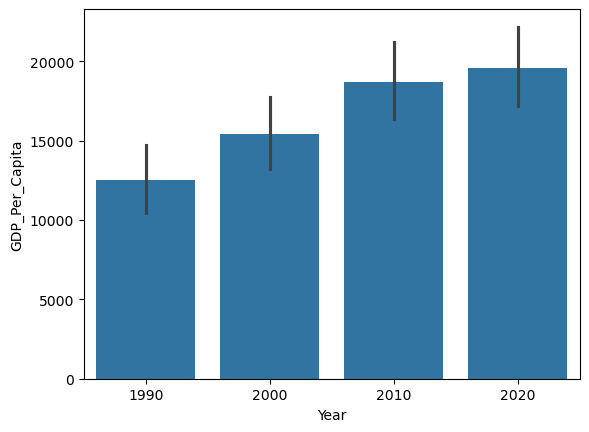

In [19]:
sns.barplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

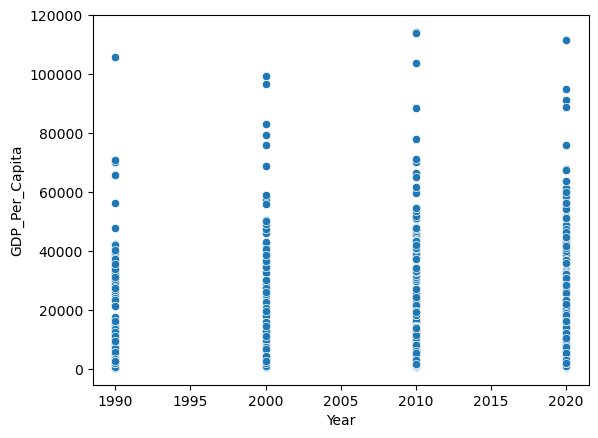

In [20]:
sns.scatterplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

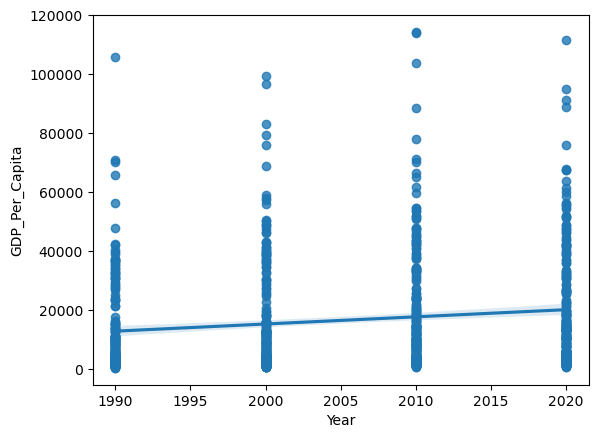

In [103]:
sns.regplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])


In [22]:
gdp_df.loc[(gdp_df.GDP_Per_Capita > 100000)].sort_values('Year').head()

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


In [23]:
gdp_question_12 = gdp_df.loc[(gdp_df["Year"] == 2020)].sort_values("GDP_Per_Capita", ascending = False)
gdp_question_12

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [24]:
lux_gdp_df= gdp_df.loc[(gdp_df['Country'] == 'Luxembourg')]


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

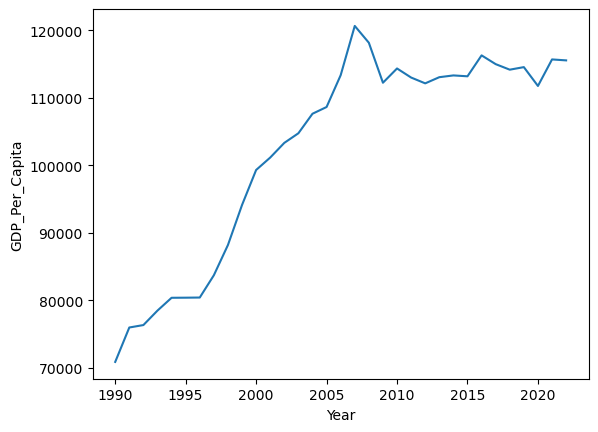

In [25]:
sns.lineplot(y= lux_gdp_df['GDP_Per_Capita'],x = lux_gdp_df['Year'])

In [26]:
gdp_question_13 = gdp_df.loc[(gdp_df["Year"] == 2020)].sort_values("GDP_Per_Capita", ascending = True)
gdp_question_13

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


In [27]:
bur_gdp_df= gdp_df.loc[(gdp_df['Country'] == 'Burundi')]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

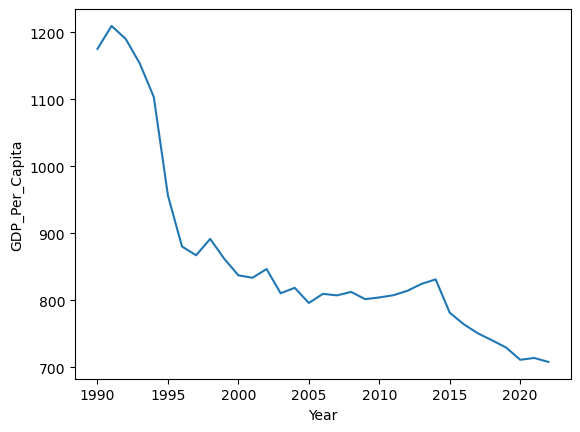

In [28]:
sns.lineplot(y= bur_gdp_df['GDP_Per_Capita'],x = bur_gdp_df['Year'])

In [29]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [30]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

In [31]:
rename_internet_df = internet_df.drop(columns = 'Value Footnotes')
rename_internet_df = rename_internet_df.rename(columns={'Country or Area': 'Country','Year':'Year','Value':'Internet_Users_Pct'})
rename_internet_df


,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [32]:
rename_internet_df['Year'].value_counts()

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

In [33]:
rename_internet_df.sort_values('Internet_Users_Pct')

,Country,Year,Internet_Users_Pct
6082,Zimbabwe,1990,0.0
5585,Tunisia,1990,0.0
1861,Eswatini,1990,0.0
5617,Türkiye,1990,0.0
454,Bangladesh,1990,0.0
...,...,...,...
4791,Saudi Arabia,2021,100.0
5716,United Arab Emirates,2022,100.0
5717,United Arab Emirates,2021,100.0
5718,United Arab Emirates,2020,100.0


In [34]:
rename_internet_df.loc[rename_internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


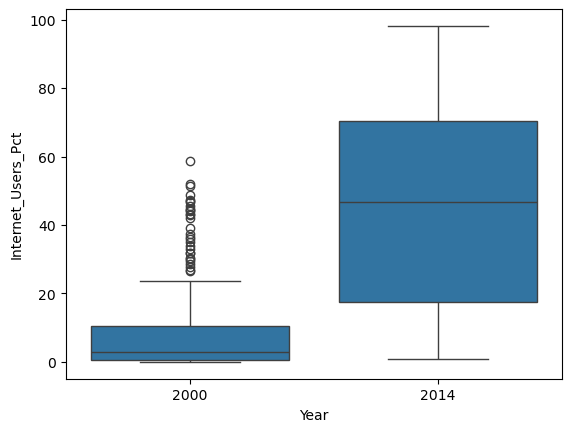

In [35]:
two_years=rename_internet_df.loc[(rename_internet_df['Year'] == 2000 )| (rename_internet_df['Year'] ==2014)]
sns.boxplot(y= two_years['Internet_Users_Pct'],x = two_years['Year']);

In [36]:
one_year = rename_internet_df.loc[(rename_internet_df['Year'] == 2014) & (rename_internet_df['Internet_Users_Pct']< 5)] 
one_year

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [37]:
gdp_and_internet_use = pd.merge(rename_internet_df,gdp_df, left_on=['Country','Year'],right_on=['Country','Year'],how = 'outer')
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2001,0.004723,NaN
2,Afghanistan,2002,0.004561,1280.463171
3,Afghanistan,2003,0.087891,1292.333437
4,Afghanistan,2004,0.105809,1260.060581
...,...,...,...,...
9107,Zimbabwe,2018,25.000000,2399.621551
9108,Zimbabwe,2019,26.588300,2203.396810
9109,Zimbabwe,2020,29.298600,1990.319419
9110,Zimbabwe,2021,32.461600,2115.144555


In [91]:
fourteen_int= gdp_and_internet_use.loc[(gdp_and_internet_use['Year']==2014)].sort_values('Internet_Users_Pct',ascending=False).head(4)
fourteen_int

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3820,Iceland,2014,98.1580,50450.741612
2780,Falkland (Malvinas) Islands,2014,97.6000,NaN
794,Bermuda,2014,96.8000,77361.104881
6243,Norway,2014,96.3005,62838.515727


In [93]:
three_guys= gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == 'Iceland')|(gdp_and_internet_use['Country'] == 'Norway')|(gdp_and_internet_use['Country'] == 'Bermuda')]
three_guys

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
770,Bermuda,1990,0.0000,65961.406278
771,Bermuda,1991,NaN,63958.896254
772,Bermuda,1992,NaN,64385.407410
773,Bermuda,1993,NaN,65967.850014
774,Bermuda,1994,NaN,65904.720421
...,...,...,...,...
6247,Norway,2018,96.4917,64696.490887
6248,Norway,2019,98.0000,64983.354208
6249,Norway,2020,94.6076,63776.160965
6250,Norway,2021,99.0000,65909.003030


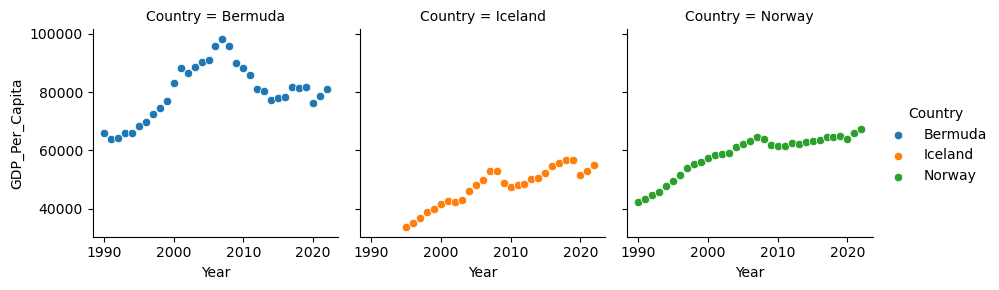

In [107]:
g = sns.FacetGrid(three_guys, col="Country",hue="Country")
g.map_dataframe(sns.scatterplot, x="Year", y="GDP_Per_Capita")
g.add_legend()

In [101]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[(gdp_and_internet_use['Year']==2014)]
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
14,Afghanistan,2014,7.0000,2144.449634
46,Africa Eastern and Southern,2014,NaN,3642.875373
79,Africa Western and Central,2014,NaN,4146.994622
112,Albania,2014,54.3000,11586.817446
145,Algeria,2014,29.5000,11561.259795
...,...,...,...,...
8978,West Bank and Gaza,2014,NaN,5967.073437
9011,World,2014,NaN,15120.730322
9039,Yemen,2014,22.5500,NaN
9070,Zambia,2014,6.5000,3375.941270


<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

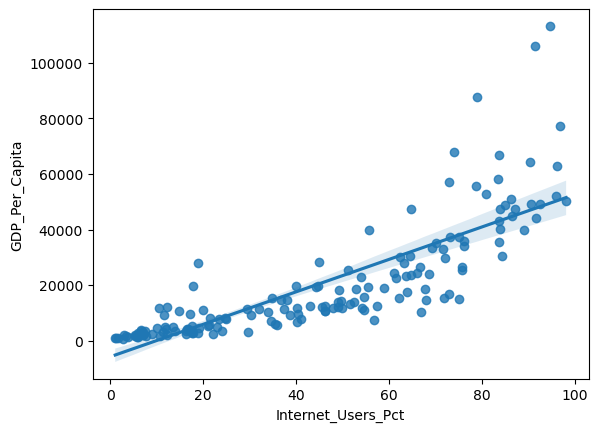

In [119]:
sns.regplot( x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"])

In [142]:
gdp_and_internet_use_2014['GDP_group']=pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3, labels=["Low", "Medium", "High"])
gdp_and_internet_use_2014


C:\Users\Jaime\AppData\Local\Temp\ipykernel_4628\352436455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group']=pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3, labels=["Low", "Medium", "High"])


,Country,Year,Internet_Users_Pct,GDP_Per_Capita,GDP_group
14,Afghanistan,2014,7.0000,2144.449634,Low
46,Africa Eastern and Southern,2014,NaN,3642.875373,Low
79,Africa Western and Central,2014,NaN,4146.994622,Low
112,Albania,2014,54.3000,11586.817446,Medium
145,Algeria,2014,29.5000,11561.259795,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,NaN,5967.073437,Low
9011,World,2014,NaN,15120.730322,Medium
9039,Yemen,2014,22.5500,NaN,NaN
9070,Zambia,2014,6.5000,3375.941270,Low


In [164]:
question_25=gdp_and_internet_use_2014['Internet_Users_Pct'].groupby(gdp_and_internet_use_2014['GDP_group']).median()
question_25

C:\Users\Jaime\AppData\Local\Temp\ipykernel_4628\833394976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  question_25=gdp_and_internet_use_2014['Internet_Users_Pct'].groupby(gdp_and_internet_use_2014['GDP_group']).median()


GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64